In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# A - KNN Algorithm for Classification

## Data Generation

In [2]:
def generate_partial_data(mean, cov, label, n):
    x1, x2 = np.random.multivariate_normal(mean, cov, n).T
    y = [label]*n
    return list(zip(x1, x2, y))

In [3]:
def generate_data(cov):
    data1 = generate_partial_data([-1, 0], cov, 0, 100)
    data2 = generate_partial_data([1, 0], cov, 1, 100)
    data3 = generate_partial_data([0, 1], cov, 2, 100)
    data = data1 + data2 + data3
    return data

In [12]:
cov = [[0.10, 0], [0, 0.10]]
data = generate_data(cov)
len(data)

300

In [13]:
X = [(data[i][0], data[i][1]) for i in range(300)]
y = [data[i][2] for i in range(300)]

## Split Train/Test

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

In [15]:
print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

225 225
75 75


## Visualize Data

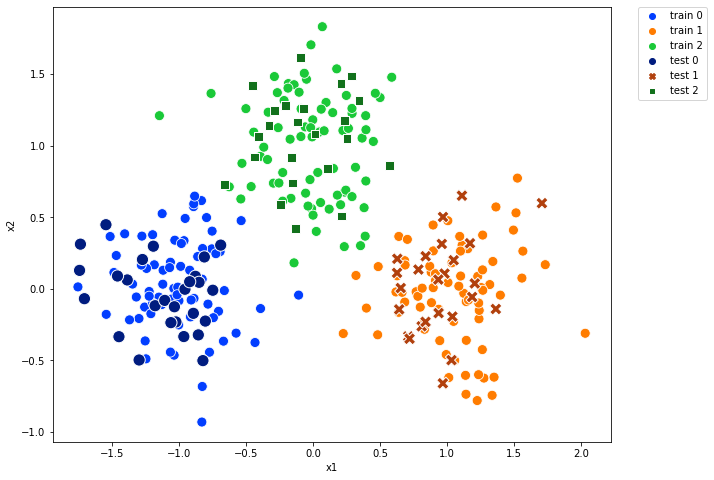

In [40]:
def plot_data(X_train, X_test, y_train, y_test):
    plt.figure(figsize=(10, 8))
    ax1 = sns.scatterplot(x=map(lambda x: x[0], X_train), y=map(lambda x: x[1], X_train), hue=y_train, s=100, palette="bright")
    ax2 = sns.scatterplot(x=map(lambda x: x[0], X_test), y=map(lambda x: x[1], X_test), hue=y_test, s=150, palette="dark", style=y_test)
    plt.xlabel('x1')
    plt.ylabel('x2')
    handles, labels  =  ax2.get_legend_handles_labels()
    ax2.legend(handles, ['train 0', 'train 1', 'train 2', 'test 0', 'test 1', 'test 2'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    
plot_data(X_train, X_test, y_train, y_test)

## KNN 
from scratch

In [4]:
# Euclidean Distance
def distance(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.linalg.norm(a - b, axis=1)

In [5]:
def knn_model(X, y, new_sample, k):
    # calculate distances of the new point with all other points in dataset
    distances = distance(X, new_sample)

    # sort distance values and select the first(nearest) k points
    nearest_points_index = distances.argsort()[:k]
    nearest_points_labels = [y[i] for i in nearest_points_index]

    # mode is the value that occurs most often
    return scipy.stats.mode(nearest_points_labels)

### Using KNN for Dataset

In [17]:
K = [i for i in range(1, 22, 2)]
train_error = []
test_error = []

for k in K:
    # train
    y_pred = []
    for x in X_train:
        predict = knn_model(X_train, y_train, x, k)
        y_pred.append(predict.mode[0])
    train_error.append(1/accuracy_score(y_train, y_pred))
    
    # test
    y_pred = []
    for x in X_test:
        predict = knn_model(X_train, y_train, x, k)
        y_pred.append(predict.mode[0])
    test_error.append(1/accuracy_score(y_test, y_pred))
    
print('Train Errors:', train_error)
print('Test Errors:', test_error)

Train Errors: [1.0, 1.0, 1.0044642857142858, 1.0044642857142858, 1.0089686098654709, 1.0044642857142858, 1.0089686098654709, 1.0, 1.0044642857142858, 1.0044642857142858, 1.0044642857142858]
Test Errors: [1.0, 1.0, 1.0, 1.0, 1.0135135135135136, 1.0135135135135136, 1.0135135135135136, 1.0135135135135136, 1.0, 1.0, 1.0]


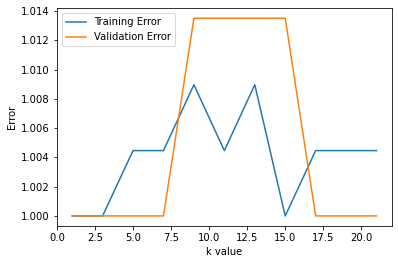

In [18]:
plt.plot(K, train_error, label='Training Error')
plt.plot(K, test_error, label='Validation Error')
plt.xlabel('k value')
plt.ylabel('Error')
plt.legend()

### k = 7 is the best value

In [36]:
best_k = 7

## Plot Decision Boundary

In [34]:
# Reference to: https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07

def plot_decision_boundary(X, y, k):
    # define bounds of the domain
    min1, max1 = np.array(list(map(lambda x: x[0], X))).min()-1, np.array(list(map(lambda x: x[0], X))).max()+1
    min2, max2 = np.array(list(map(lambda x: x[1], X))).min()-1, np.array(list(map(lambda x: x[1], X))).max()+1
    # define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    # create all of the lines and rows of the grid
    xx, yy = np.meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    # horizontal stack vectors to create x1,x2 input for the model
    grid = np.hstack((r1,r2))
    # predicted values
    y_pred = []
    for x in grid:
        predict = knn_model(X, y, x, k)
        y_pred.append(predict.mode[0])
    zz = np.array(y_pred).reshape(xx.shape)
    # plot
    plt.contourf(xx, yy, zz, alpha = 0.5, cmap=plt.cm.RdYlBu)

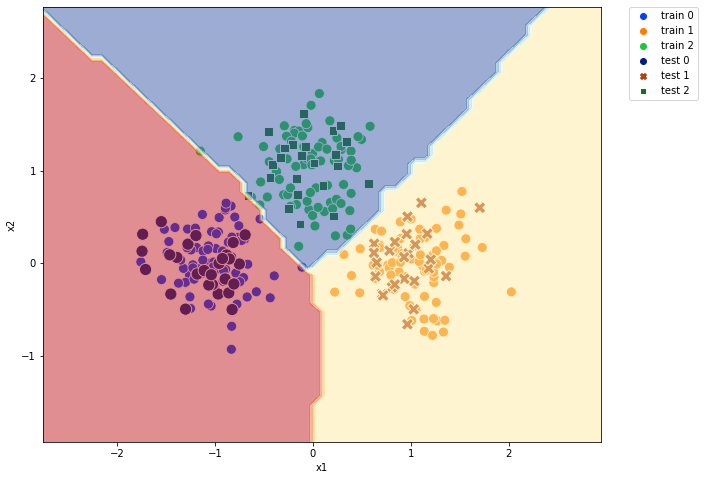

In [41]:
plot_data(X_train, X_test, y_train, y_test)

plot_decision_boundary(X_train, y_train, best_k)

## Algorithm for 50 Random Datasets

In [6]:
sigma2 = [0.10, 0.15, 0.20, 0.25]
k = 1

average_error_rate = []
standard_deviation = []

for sig in sigma2:
    test_error = []
    for i in range(50):
        # generate dataset
        data = generate_data(np.identity(2) * [sig])
        X = [(data[i][0], data[i][1]) for i in range(300)]
        y = [data[i][2] for i in range(300)]
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.25, shuffle=True)

        # run the model
        y_pred = []
        for x in X_test:
            predict = knn_model(X_train, y_train, x, k)
            y_pred.append(predict.mode[0])

        # calculate error
        test_error.append(1/accuracy_score(y_test, y_pred))
    
    average_error_rate.append(np.mean(test_error))
    standard_deviation.append(np.std(test_error))

    print('for Variance =', sig)
    print('Average Error Rate:', np.mean(test_error))
    print('Standard Deviation:', np.std(test_error))

for Variance = 0.1
Average Error Rate: 1.0264984168923248
Standard Deviation: 0.0231116715366592
for Variance = 0.15
Average Error Rate: 1.0779632251111997
Standard Deviation: 0.03824763195162688
for Variance = 0.2
Average Error Rate: 1.1253462853334746
Standard Deviation: 0.04735707132539991
for Variance = 0.25
Average Error Rate: 1.188271863437108
Standard Deviation: 0.057091464330080735


Text(0, 0.5, 'Average Error Rate')

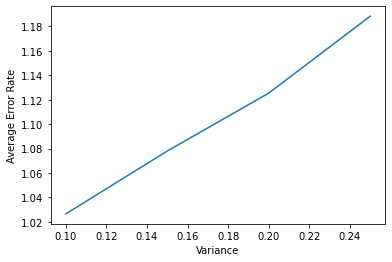

In [7]:
plt.plot(sigma2, average_error_rate)
plt.xlabel('Variance')
plt.ylabel('Average Error Rate')

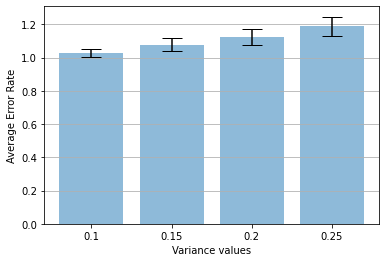

In [8]:
# Define labels, positions, bar heights and error bar heights
labels = sigma2
x_pos = np.arange(len(labels))

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, average_error_rate,
       yerr=standard_deviation,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Average Error Rate')
ax.set_xlabel('Variance values')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
plt.show()